<a href="https://colab.research.google.com/github/adewale-codes/Banking/blob/main/Download_tuned_model_with_feature_engineering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Model Tuning and Optimization
This notebook performs feature engineering followed by hyperparameter tuning and evaluation of a Random Forest model using GridSearchCV.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder, MinMaxScaler
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay

sns.set(style='whitegrid')

##Load Dataset

In [2]:
df = pd.read_csv('heart.csv')
df.drop_duplicates(inplace=True)
df.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0


##Feature Engineering

In [3]:
# Create Age Groups
bins = [0, 39, 59, 100]
labels = ['Young', 'Middle-aged', 'Senior']
df['AgeGroup'] = pd.cut(df['Age'], bins=bins, labels=labels)

# Bin Cholesterol
chol_bins = [0, 200, 239, np.inf]
chol_labels = ['Normal', 'Borderline', 'High']
df['CholesterolLevel'] = pd.cut(df['Cholesterol'], bins=chol_bins, labels=chol_labels)

# One-hot encode categorical features
df_encoded = pd.get_dummies(df, columns=['ChestPainType', 'RestingECG', 'ST_Slope', 'AgeGroup', 'CholesterolLevel'], drop_first=True)

# Label encode binary fields
le = LabelEncoder()
df_encoded['Sex'] = le.fit_transform(df_encoded['Sex'])
df_encoded['ExerciseAngina'] = le.fit_transform(df_encoded['ExerciseAngina'])
df_encoded['FastingBS'] = df_encoded['FastingBS'].astype(int)

# Scale numerical features
scaler = MinMaxScaler()
num_cols = ['RestingBP', 'Cholesterol', 'MaxHR', 'Oldpeak']
df_encoded[num_cols] = scaler.fit_transform(df_encoded[num_cols])

##Train-Test Split

In [4]:
X = df_encoded.drop('HeartDisease', axis=1)
y = df_encoded['HeartDisease']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

## 🔍 Hyperparameter Tuning with GridSearchCV

In [5]:
param_grid = {
    'n_estimators': [50, 100, 150],
    'max_depth': [None, 5, 10],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2]
}

grid_search = GridSearchCV(RandomForestClassifier(random_state=42), param_grid,
                           cv=5, scoring='f1', n_jobs=-1)
grid_search.fit(X_train, y_train)
print("Best Parameters:", grid_search.best_params_)

Best Parameters: {'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 100}


##Evaluate Best Model

              precision    recall  f1-score   support

           0       0.82      0.84      0.83        77
           1       0.89      0.87      0.88       107

    accuracy                           0.86       184
   macro avg       0.85      0.86      0.86       184
weighted avg       0.86      0.86      0.86       184



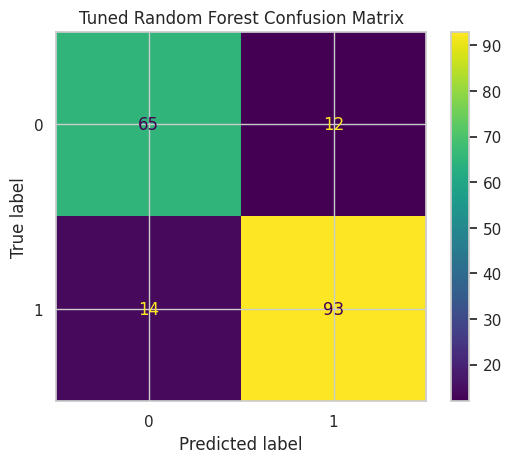

In [6]:
best_model = grid_search.best_estimator_
y_pred = best_model.predict(X_test)
print(classification_report(y_test, y_pred))
cm = confusion_matrix(y_test, y_pred)
ConfusionMatrixDisplay(confusion_matrix=cm).plot()
plt.title("Tuned Random Forest Confusion Matrix")
plt.show()

##Cross-Validation Score

In [7]:
cv_scores = cross_val_score(best_model, X, y, cv=5, scoring='f1')
print("Cross-Validated F1 Scores:", cv_scores)
print("Mean F1 Score:", cv_scores.mean())

Cross-Validated F1 Scores: [0.88082902 0.83769634 0.85957447 0.83333333 0.75789474]
Mean F1 Score: 0.8338655777766242


##Summary
- Feature engineering applied directly in this notebook
- Random Forest tuned with GridSearchCV
- Evaluated on test data and validated using cross-validation

Model is now optimized and ready for deployment or integration.